In [114]:
#importing libraries
import numpy as np
import math
import pandas as pd
import sympy as sym
from sympy import symbols, exp, Function, solve
from scipy import interpolate
import matplotlib.pyplot as plt 
import glob
import scipy.interpolate as interpolate



%matplotlib inline

#setting precision upto10 digits
np.set_printoptions(precision=20)
np.set_printoptions(suppress=True)

In [115]:
#importing data
df=[]    
files = glob.glob("*.dat")
for a in files:
    df.append( pd.read_csv(a,sep="\s+", skiprows=5,  index_col =None))
col = ["A50_Old", "M350_Old" ,"M350_Old_tare", "A50_Old_tare","M350_Fixed","M350_Rot","M2000_Rot","M2000_Fixed","A50_Fixed","A50_Rot","A50_tare","M2000_tare","M350_tare"]
rovsT = pd.read_excel("rovsT.xlsx")

files

['19619 Feathershuttlec_AoA0_fine_run_030817_repeat.dat',
 '19624 Shuttlecock_synthetic_AoA0_fine_run_030817.dat',
 '19628 Synthetic_shuttle_cock_tare_AoA0_030817.dat',
 '19629 Feather_shuttle_cock_tare_AoA0_030817.dat',
 '29028 Shuttlecock_Synthetic_M350_Fixed_Coarse.dat',
 '29029 Shuttlecock_Synthetic_M350_with_Spin_Coarse.dat',
 '29030 Shuttlecock_Synthetic_M2200_with_Spin_Coarse.dat',
 '29031 Shuttlecock_Synthetic_M2200_Fixed_Coarse.dat',
 '29035 Shuttlecock_Feather_A50_Fixed_Coarse.dat',
 '29036 Shuttlecock_Feather_A50_with_Spin_Coarse.dat',
 '29037 Shuttlecock_Feather_A50_Tare.dat',
 '29038 Shuttlecock_Synthetic_M2200_Tare.dat',
 '29039 Shuttlecock_Synthetic_M350_Tare.dat']

In [116]:
df[0]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu
0,59.51249,38.16576,0.0,0.0,0.0,0.60532,0.13722,-0.10858,-5.60281,0.94391,0.62529,0.17498
1,132.79826,37.97290,0.0,0.0,0.0,0.61593,0.06491,-0.05252,-4.98983,0.54039,0.16931,0.08350
2,236.06817,37.68683,0.0,0.0,0.0,0.62730,0.04404,-0.01451,-4.88146,0.28844,0.06684,0.04637
3,367.91518,37.60113,0.0,0.0,0.0,0.62600,0.03175,0.01223,-4.98096,0.11747,0.02538,0.03402
4,537.91122,37.59580,0.0,0.0,0.0,0.62797,0.01847,0.02242,-4.89807,0.06365,-0.01385,0.02905
5,723.38486,37.61522,0.0,0.0,0.0,0.62403,0.00987,0.03052,-4.57603,0.02887,-0.05185,0.03208
6,942.35038,37.70870,0.0,0.0,0.0,0.61814,0.00338,0.03667,-4.38958,-0.00046,-0.07962,0.03683
7,1209.07650,37.80529,0.0,0.0,0.0,0.61177,0.00117,0.04019,-4.12955,-0.00312,-0.06098,0.04021
8,1473.36504,38.13837,0.0,0.0,0.0,0.60562,-0.00043,0.04317,-4.06239,-0.00788,-0.05063,0.04317
9,1780.45977,38.63822,0.0,0.0,0.0,0.59780,-0.00349,0.04635,-3.84034,-0.01250,-0.05756,0.04648


In [117]:
#chagning Rm unit of old data 
for i in range(4):
    df[i]["Crm"] = df[i]["Crm"]/100
df[0]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu
0,59.51249,38.16576,0.0,0.0,0.0,0.60532,0.13722,-0.10858,-0.056028,0.94391,0.62529,0.17498
1,132.79826,37.97290,0.0,0.0,0.0,0.61593,0.06491,-0.05252,-0.049898,0.54039,0.16931,0.08350
2,236.06817,37.68683,0.0,0.0,0.0,0.62730,0.04404,-0.01451,-0.048815,0.28844,0.06684,0.04637
3,367.91518,37.60113,0.0,0.0,0.0,0.62600,0.03175,0.01223,-0.049810,0.11747,0.02538,0.03402
4,537.91122,37.59580,0.0,0.0,0.0,0.62797,0.01847,0.02242,-0.048981,0.06365,-0.01385,0.02905
5,723.38486,37.61522,0.0,0.0,0.0,0.62403,0.00987,0.03052,-0.045760,0.02887,-0.05185,0.03208
6,942.35038,37.70870,0.0,0.0,0.0,0.61814,0.00338,0.03667,-0.043896,-0.00046,-0.07962,0.03683
7,1209.07650,37.80529,0.0,0.0,0.0,0.61177,0.00117,0.04019,-0.041295,-0.00312,-0.06098,0.04021
8,1473.36504,38.13837,0.0,0.0,0.0,0.60562,-0.00043,0.04317,-0.040624,-0.00788,-0.05063,0.04317
9,1780.45977,38.63822,0.0,0.0,0.0,0.59780,-0.00349,0.04635,-0.038403,-0.01250,-0.05756,0.04648


In [118]:
def dia(s):
    if s == "M350_Fixed":
        return 0.0665
    elif s == "M350_Rot":
        return 0.0665
    elif s == "M350_tare":
        return 0.0665
    elif s == "M2000_Fixed":
        return 0.065
    elif s == "M2000_Rot":
        return 0.065
    elif s == "M2000_tare":
        return 0.065
    elif s == "A50_Fixed":
        return 0.0651875
    elif s == "A50_Rot":
        return 0.0651875
    elif s == "A50_tare":
        return 0.0651875
    elif s == "A50_Old":
        return 0.0651875
    elif s == "M350_Old":
        return 0.0665
    elif s == "A50_Old_tare":
        return 0.0651875
    elif s == "M350_Old_tare":
        return 0.0665
    else:
        return 0
    
rovsT

,Temperature (T) ◦c,Density (ρ) kg/m3,Dynamic Viscosity,Kinematic Viscosity,Specific Heat Capacity (cp) x103 J/kg.K,Thermal Conductivity (k) W/m.K,Prandtl Number (Pr)
0,-20,1.39580,0.000016,0.000012,1.0054,0.022507,0.72467
1,-15,1.36870,0.000016,0.000012,1.0054,0.022903,0.72337
2,-10,1.34260,0.000017,0.000012,1.0055,0.023296,0.72212
3,-5,1.31750,0.000017,0.000013,1.0055,0.023686,0.72092
4,0,1.29330,0.000017,0.000013,1.0056,0.024073,0.71977
5,5,1.26990,0.000017,0.000014,1.0057,0.024458,0.71866
6,10,1.24740,0.000018,0.000014,1.0058,0.024840,0.71759
7,15,1.22570,0.000018,0.000015,1.0059,0.025219,0.71657
8,20,1.20470,0.000018,0.000015,1.0061,0.025596,0.71559
9,25,1.18450,0.000018,0.000016,1.0063,0.025969,0.71465


# Sawal
1. How to get velo from Q
2. What to do with first data i.e no wind data?
3. How to calculate Resu


In [119]:
#checking for extra row
for i in range(len(df)):
    print(len(df[i]), col[i])

13 A50_Old
13 M350_Old
13 M350_Old_tare
13 A50_Old_tare
7 M350_Fixed
8 M350_Rot
8 M2000_Rot
7 M2000_Fixed
8 A50_Fixed
8 A50_Rot
8 A50_tare
8 M2000_tare
8 M350_tare


In [120]:
#deleting values at 0 mps
for i in range(len(df)):
    if len(df[i]) == 8:
        df[i] = df[i].iloc[1: , :]
        df[i].reset_index(inplace=True, drop = True)
    elif len(df[i]) == 14:
        df[i] = df[i].iloc[0:len(df[i]) -1 , :]
        df[i].reset_index(inplace=True, drop = True)

for i in range(len(df)):
    print(len(df[i]), col[i])
df[1]

13 A50_Old
13 M350_Old
13 M350_Old_tare
13 A50_Old_tare
7 M350_Fixed
7 M350_Rot
7 M2000_Rot
7 M2000_Fixed
7 A50_Fixed
7 A50_Rot
7 A50_tare
7 M2000_tare
7 M350_tare


,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu
0,60.70155,37.59904,0.0,0.0,0.0,0.73504,0.02249,0.02389,-0.007940,0.16388,0.20388,0.03281
1,133.33333,38.07227,0.0,0.0,0.0,0.69515,0.00346,0.01622,-0.018804,0.11714,0.11518,0.01658
2,236.78161,38.27311,0.0,0.0,0.0,0.67701,0.00103,0.02658,-0.012340,0.05071,0.10992,0.02660
3,370.41221,38.43271,0.0,0.0,0.0,0.65754,0.00302,0.03027,-0.014165,0.02503,0.12707,0.03042
4,530.71740,38.57787,0.0,0.0,0.0,0.63266,0.00257,0.01846,-0.014208,0.08156,0.12419,0.01864
5,720.98692,38.76035,0.0,0.0,0.0,0.61250,0.00347,0.02584,-0.013675,0.02831,0.13404,0.02607
6,943.69798,38.99984,0.0,0.0,0.0,0.57011,0.00252,0.01144,-0.012061,0.03396,0.12577,0.01171
7,1142.66746,39.22292,0.0,0.0,0.0,0.52752,-0.00146,0.00406,-0.011035,0.01614,0.07967,0.00432
8,1472.67142,39.57798,0.0,0.0,0.0,0.47918,-0.00283,0.00783,-0.010799,0.00994,0.07035,0.00833
9,1796.45264,40.02958,0.0,0.0,0.0,0.44747,-0.00381,0.01194,-0.010112,0.00462,0.06240,0.01253


In [121]:
#creating linear interpolation function
density = interpolate.interp1d(rovsT["Temperature (T) ◦c"], rovsT["Density (ρ) kg/m3"], kind='linear')
kinematic_viscosity = interpolate.interp1d(rovsT["Temperature (T) ◦c"], rovsT["Kinematic Viscosity"], kind='linear')
kinematic_viscosity(33)

array(0.0000163186)

In [122]:
df[0].columns[5:12]

Index(['Cd', 'Cs', 'CL', 'Crm', 'Cpm', 'Cym', 'Resu'], dtype='object')

In [123]:
#error in Str RPM of data 8, setting it to 0
df[8]['StrRPM'][:] = 0
df[8]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu,StrRPM,OpRPM
0,61.69213,30.0,0.0,0.0,0.0,0.60296,-0.01665,-0.07053,-0.01803,0.40279,-0.30704,0.07247,0.0,0.0
1,238.77791,30.5,0.0,0.0,0.0,0.61049,-0.01764,-0.02875,-0.02395,0.02064,-0.30293,0.03373,0.0,0.0
2,533.68586,31.2,0.0,0.0,0.0,0.61384,-0.03194,-0.01798,-0.02467,-0.03185,-0.40917,0.03666,0.0,0.0
3,951.50803,31.2,0.0,0.0,0.0,0.60462,-0.03873,-0.00666,-0.02415,-0.06171,-0.48334,0.03930,0.0,0.0
4,1556.13004,32.0,0.0,0.0,0.0,0.59299,-0.03789,-0.00834,-0.02578,-0.06544,-0.45886,0.03880,0.0,0.0
5,2197.29730,32.5,0.0,0.0,0.0,0.57645,-0.04040,-0.00415,-0.02545,-0.08240,-0.48605,0.04062,0.0,0.0
6,2888.52331,33.5,0.0,0.0,0.0,0.56104,-0.04291,-0.00463,-0.02533,-0.08412,-0.52308,0.04316,0.0,0.0


In [124]:
df

[          Qinf      Temp  Pitch  Yaw  Roll       Cd       Cs       CL  \
 0     59.51249  38.16576    0.0  0.0   0.0  0.60532  0.13722 -0.10858   
 1    132.79826  37.97290    0.0  0.0   0.0  0.61593  0.06491 -0.05252   
 2    236.06817  37.68683    0.0  0.0   0.0  0.62730  0.04404 -0.01451   
 3    367.91518  37.60113    0.0  0.0   0.0  0.62600  0.03175  0.01223   
 4    537.91122  37.59580    0.0  0.0   0.0  0.62797  0.01847  0.02242   
 5    723.38486  37.61522    0.0  0.0   0.0  0.62403  0.00987  0.03052   
 6    942.35038  37.70870    0.0  0.0   0.0  0.61814  0.00338  0.03667   
 7   1209.07650  37.80529    0.0  0.0   0.0  0.61177  0.00117  0.04019   
 8   1473.36504  38.13837    0.0  0.0   0.0  0.60562 -0.00043  0.04317   
 9   1780.45977  38.63822    0.0  0.0   0.0  0.59780 -0.00349  0.04635   
 10  2122.33452  39.11505    0.0  0.0   0.0  0.58872 -0.00333  0.04691   
 11  2492.88545  39.77261    0.0  0.0   0.0  0.58068  0.00278  0.04649   
 12  2887.39596  40.65735    0.0  0.0 

In [125]:
df[3]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu
0,61.03845,39.51853,0.0,0.0,0.0,-0.04929,0.06464,-0.07568,-0.017837,0.39340,0.32750,0.09953
1,132.50099,39.94634,0.0,0.0,0.0,-0.02405,0.04389,-0.02110,-0.012997,0.10564,0.22360,0.04870
2,237.07887,39.95148,0.0,0.0,0.0,-0.00854,0.02595,-0.03448,-0.011556,0.17218,0.12513,0.04316
3,368.45026,39.95957,0.0,0.0,0.0,-0.00178,0.01486,0.00238,-0.008577,-0.03829,0.06030,0.01505
4,531.17321,40.01266,0.0,0.0,0.0,0.00245,0.00926,-0.00140,-0.010023,-0.00654,0.04250,0.00936
5,720.17440,40.09138,0.0,0.0,0.0,0.00487,0.00244,0.00915,-0.006762,-0.06415,0.00518,0.00947
6,944.41141,40.23312,0.0,0.0,0.0,0.00828,-0.00384,0.01053,-0.006508,-0.07365,-0.03950,0.01121
7,1200.61435,40.35385,0.0,0.0,0.0,0.00908,-0.00977,0.01265,-0.004785,-0.08921,-0.08989,0.01598
8,1470.96710,40.60438,0.0,0.0,0.0,0.00986,-0.01649,0.01308,-0.003866,-0.08708,-0.14546,0.02104
9,1777.58621,40.97929,0.0,0.0,0.0,0.00987,-0.01943,0.01173,-0.003689,-0.07421,-0.16280,0.02270


In [126]:
#adding time corrected velocity abd reynlds number and advanced ratio
for i in range(len(df)):
    df[i]["U"] = 0.0
    df[i]["Re"] = 0.0
    df[i]["J"] = 0.0
    for j in range(df[i].shape[0]):
        df[i]["U"][j] = math.sqrt(2*(df[i]["Qinf"][j])/density(df[i]["Temp"][j]))
        df[i]["Re"][j] = df[i]["U"][j] * dia(col[i])/kinematic_viscosity(df[i]["Temp"][j])
        if 'StrRPM' in df[i].columns and df[i]['StrRPM'][0] != 0:
            df[i]["J"][j] = (df[i]["U"][j]*30) / ((dia(col[i])*df[i]["StrRPM"][j])*math.pi)
df

[          Qinf      Temp  Pitch  Yaw  Roll       Cd       Cs       CL  \
 0     59.51249  38.16576    0.0  0.0   0.0  0.60532  0.13722 -0.10858   
 1    132.79826  37.97290    0.0  0.0   0.0  0.61593  0.06491 -0.05252   
 2    236.06817  37.68683    0.0  0.0   0.0  0.62730  0.04404 -0.01451   
 3    367.91518  37.60113    0.0  0.0   0.0  0.62600  0.03175  0.01223   
 4    537.91122  37.59580    0.0  0.0   0.0  0.62797  0.01847  0.02242   
 5    723.38486  37.61522    0.0  0.0   0.0  0.62403  0.00987  0.03052   
 6    942.35038  37.70870    0.0  0.0   0.0  0.61814  0.00338  0.03667   
 7   1209.07650  37.80529    0.0  0.0   0.0  0.61177  0.00117  0.04019   
 8   1473.36504  38.13837    0.0  0.0   0.0  0.60562 -0.00043  0.04317   
 9   1780.45977  38.63822    0.0  0.0   0.0  0.59780 -0.00349  0.04635   
 10  2122.33452  39.11505    0.0  0.0   0.0  0.58872 -0.00333  0.04691   
 11  2492.88545  39.77261    0.0  0.0   0.0  0.58068  0.00278  0.04649   
 12  2887.39596  40.65735    0.0  0.0 

In [127]:
df[5]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu,StrRPM,OpRPM,U,Re,J
0,57.93184,31.6,0.0,0.0,0.0,0.68534,0.06669,0.00152,-0.01297,0.16920,0.40469,0.06671,448.0,460.0,9.999210,41079.813105,3.205069
1,246.10262,31.6,0.0,0.0,0.0,0.66281,0.01582,-0.00966,-0.00784,0.19428,0.07547,0.01854,1251.0,1284.0,20.609389,84669.679612,2.365688
2,514.88445,31.6,0.0,0.0,0.0,0.66547,0.00686,0.00481,-0.00782,0.06738,0.01729,0.00837,2040.0,2072.0,29.809994,122468.580975,2.098367
3,962.00548,31.6,0.0,0.0,0.0,0.66966,-0.00321,0.01259,-0.00370,-0.00003,-0.05170,0.01299,3092.0,3092.0,40.747013,167401.201514,1.892370
4,1470.85781,31.6,0.0,0.0,0.0,0.70588,-0.01239,0.01737,-0.00372,-0.04051,-0.12204,0.02134,4336.0,4438.0,50.383966,206992.754217,1.668602
5,2127.37955,32.2,0.0,0.0,0.0,0.66345,-0.01515,0.01656,-0.00208,-0.04171,-0.13603,0.02245,4839.0,4854.0,60.653680,248316.822932,1.799912
6,2955.22914,33.0,0.0,0.0,0.0,0.53739,-0.02315,0.01945,-0.00178,-0.05394,-0.21286,0.03023,3700.0,3768.0,71.581662,291702.752261,2.778112


In [128]:
#testing interp function
interp1 = interpolate.interp1d(df[8]["U"], df[8]["Cs"], kind='linear',fill_value='extrapolate')
interp1(50)

array(-0.03802737580702063)

In [129]:
df[0]-df[3]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu,U,Re,J
0,-1.52596,-1.35277,0.0,0.0,0.0,0.65461,0.07258,-0.03290,-0.038191,0.55051,0.29779,0.07545,-0.153342,-288.738706,0.0
1,0.29727,-1.97344,0.0,0.0,0.0,0.63998,0.02102,-0.03142,-0.036902,0.43475,-0.05429,0.03480,-0.031992,533.060336,0.0
2,-1.01070,-2.26465,0.0,0.0,0.0,0.63584,0.01809,0.01997,-0.037259,0.11626,-0.05829,0.00321,-0.118948,547.959586,0.0
3,-0.53508,-2.35844,0.0,0.0,0.0,0.62778,0.01689,0.00985,-0.041233,0.15576,-0.03492,0.01897,-0.116309,860.018599,0.0
4,6.73801,-2.41686,0.0,0.0,0.0,0.62552,0.00921,0.02382,-0.038958,0.07019,-0.05635,0.01969,0.072979,1898.756953,0.0
5,3.21046,-2.47616,0.0,0.0,0.0,0.61916,0.00743,0.02137,-0.038999,0.09302,-0.05703,0.02261,-0.064151,1676.630696,0.0
6,-2.06103,-2.52442,0.0,0.0,0.0,0.60986,0.00722,0.02614,-0.037388,0.07319,-0.04012,0.02562,-0.211699,1424.426636,0.0
7,8.46215,-2.54856,0.0,0.0,0.0,0.60269,0.01094,0.02754,-0.036511,0.08609,0.02891,0.02423,-0.028292,2447.081186,0.0
8,2.39794,-2.46601,0.0,0.0,0.0,0.59576,0.01606,0.03009,-0.036758,0.07920,0.09483,0.02213,-0.161524,2107.204430,0.0
9,2.87356,-2.34107,0.0,0.0,0.0,0.58793,0.01594,0.03462,-0.034714,0.06171,0.10524,0.02378,-0.165633,2205.069337,0.0


In [130]:
#export to csv file before tare correction
for i in range(len(df)):
    
    df[i].to_csv(col[i] + ' without tare' + '.csv', index = False)

In [131]:
col

['A50_Old',
 'M350_Old',
 'M350_Old_tare',
 'A50_Old_tare',
 'M350_Fixed',
 'M350_Rot',
 'M2000_Rot',
 'M2000_Fixed',
 'A50_Fixed',
 'A50_Rot',
 'A50_tare',
 'M2000_tare',
 'M350_tare']

In [132]:
#tare correction

for i in df[0].columns[4:12]:
    interp1 = interpolate.interp1d(df[12]["U"], df[12][i], kind='linear',fill_value='extrapolate')
    interp2 = interpolate.interp1d(df[11]["U"], df[11][i], kind='linear',fill_value='extrapolate')
    interp3 = interpolate.interp1d(df[10]["U"], df[10][i], kind='linear',fill_value='extrapolate')
    interp4 = interpolate.interp1d(df[2]["U"], df[2][i], kind='linear',fill_value='extrapolate')
    interp5 = interpolate.interp1d(df[3]["U"], df[3][i], kind='linear',fill_value='extrapolate')
    
    for j in range(df[5].shape[0]):
        
        df[4][i][j] = df[4][i][j] - interp1(df[4]["U"][j])        #for 350
        df[5][i][j] = df[5][i][j] - interp1(df[5]["U"][j])
        
        df[6][i][j] = df[6][i][j] - interp2(df[6]["U"][j])        #for 2000
        df[7][i][j] = df[7][i][j] - interp2(df[7]["U"][j])
        
        df[8][i][j] = df[8][i][j] - interp3(df[8]["U"][j])        #for A50
        df[9][i][j] = df[9][i][j] - interp3(df[9]["U"][j])
        
    for j in range(df[0].shape[0]):
        df[1][i][j] = df[1][i][j] - interp4(df[1]["U"][j])         #for  M350 Old
        df[0][i][j] = df[0][i][j] - interp5(df[0]["U"][j])         #for  A50 old

df[0] 

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu,U,Re,J
0,59.51249,38.16576,0.0,0.0,0.0,0.655395,0.071935,-0.031203,-0.038040,0.541564,0.294560,0.073870,10.243884,39730.083922,0.0
1,132.79826,37.97290,0.0,0.0,0.0,0.640144,0.020885,-0.031066,-0.036870,0.432884,-0.054964,0.034470,15.297518,59394.940883,0.0
2,236.06817,37.68683,0.0,0.0,0.0,0.636196,0.017678,0.019663,-0.037226,0.117789,-0.060553,0.003083,20.386476,79281.928926,0.0
3,367.91518,37.60113,0.0,0.0,0.0,0.627935,0.016635,0.010698,-0.041164,0.150920,-0.036411,0.018324,25.447026,99010.227743,0.0
4,537.91122,37.59580,0.0,0.0,0.0,0.625485,0.009309,0.023668,-0.039005,0.071022,-0.055811,0.019688,30.769095,119721.151407,0.0
5,723.38486,37.61522,0.0,0.0,0.0,0.619191,0.007343,0.021504,-0.038957,0.092288,-0.057504,0.022611,35.682707,138824.502627,0.0
6,942.35038,37.70870,0.0,0.0,0.0,0.609999,0.006964,0.026196,-0.037378,0.072803,-0.041940,0.025691,40.732873,158388.357117,0.0
7,1209.07650,37.80529,0.0,0.0,0.0,0.602694,0.010908,0.027551,-0.036501,0.086006,0.028637,0.024256,46.145960,179338.796138,0.0
8,1473.36504,38.13837,0.0,0.0,0.0,0.595785,0.015841,0.030104,-0.036728,0.079269,0.093019,0.022295,50.967870,197705.406365,0.0
9,1780.45977,38.63822,0.0,0.0,0.0,0.587930,0.015845,0.034576,-0.034708,0.062127,0.104678,0.023834,56.073776,216898.433460,0.0


In [133]:
interp = interpolate.interp1d(df[0]["U"], df[0]["Cs"], kind='linear')
interp(15)

array(0.02389079860480818)

In [134]:
#correcting the residual force after tare correction
for i in range(len(df)-3):
    for j in range(df[i].shape[0]):
        df[i]["Resu"][j] = math.sqrt(df[i]["Cs"][j]*df[i]["Cs"][j] + df[i]["CL"][j]*df[i]["CL"][j])
df[0]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu,U,Re,J
0,59.51249,38.16576,0.0,0.0,0.0,0.655395,0.071935,-0.031203,-0.038040,0.541564,0.294560,0.078411,10.243884,39730.083922,0.0
1,132.79826,37.97290,0.0,0.0,0.0,0.640144,0.020885,-0.031066,-0.036870,0.432884,-0.054964,0.037434,15.297518,59394.940883,0.0
2,236.06817,37.68683,0.0,0.0,0.0,0.636196,0.017678,0.019663,-0.037226,0.117789,-0.060553,0.026441,20.386476,79281.928926,0.0
3,367.91518,37.60113,0.0,0.0,0.0,0.627935,0.016635,0.010698,-0.041164,0.150920,-0.036411,0.019778,25.447026,99010.227743,0.0
4,537.91122,37.59580,0.0,0.0,0.0,0.625485,0.009309,0.023668,-0.039005,0.071022,-0.055811,0.025432,30.769095,119721.151407,0.0
5,723.38486,37.61522,0.0,0.0,0.0,0.619191,0.007343,0.021504,-0.038957,0.092288,-0.057504,0.022723,35.682707,138824.502627,0.0
6,942.35038,37.70870,0.0,0.0,0.0,0.609999,0.006964,0.026196,-0.037378,0.072803,-0.041940,0.027106,40.732873,158388.357117,0.0
7,1209.07650,37.80529,0.0,0.0,0.0,0.602694,0.010908,0.027551,-0.036501,0.086006,0.028637,0.029632,46.145960,179338.796138,0.0
8,1473.36504,38.13837,0.0,0.0,0.0,0.595785,0.015841,0.030104,-0.036728,0.079269,0.093019,0.034017,50.967870,197705.406365,0.0
9,1780.45977,38.63822,0.0,0.0,0.0,0.587930,0.015845,0.034576,-0.034708,0.062127,0.104678,0.038034,56.073776,216898.433460,0.0


<ipython-input-135-f0efa34d87f3>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(count)


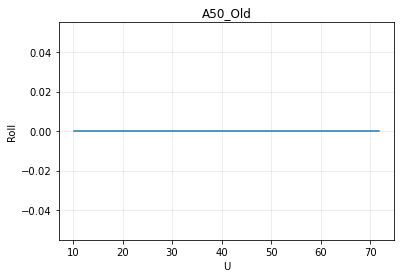

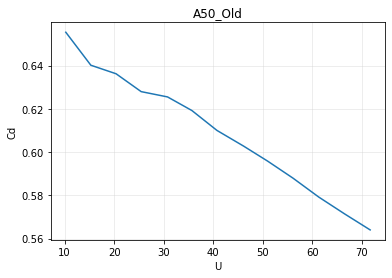

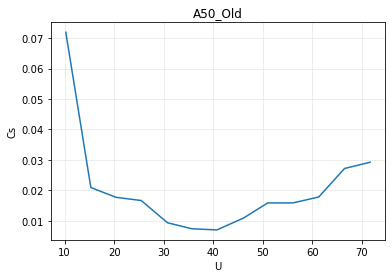

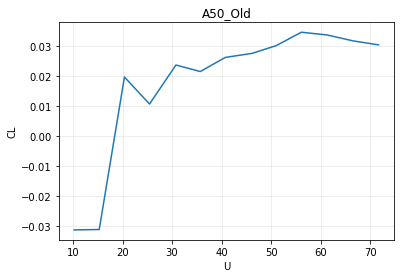

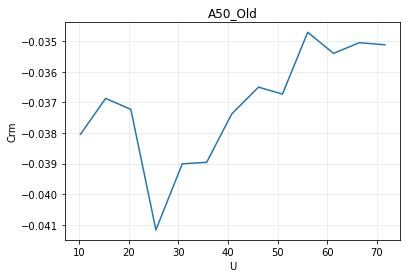

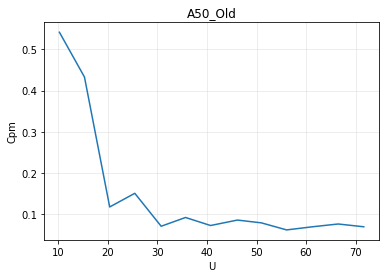

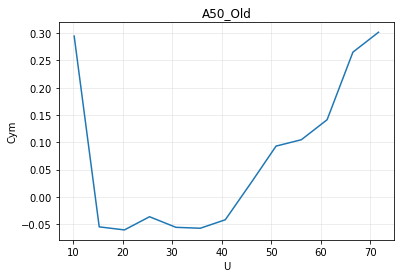

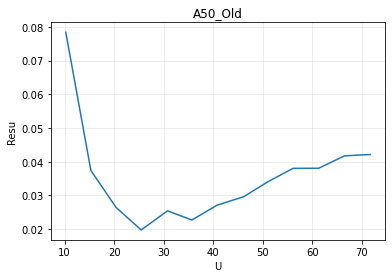

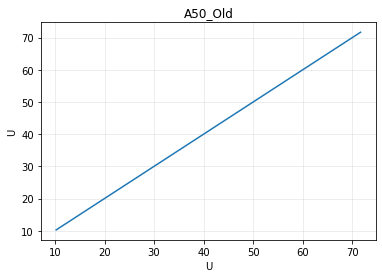

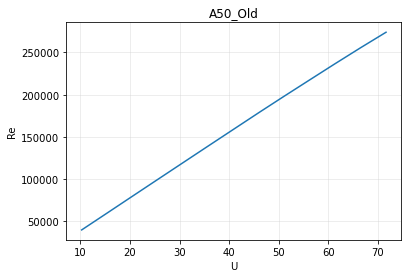

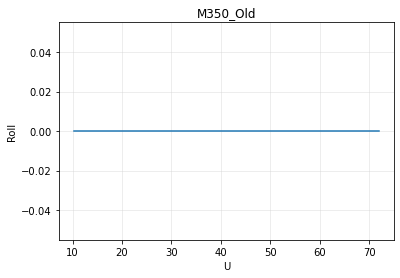

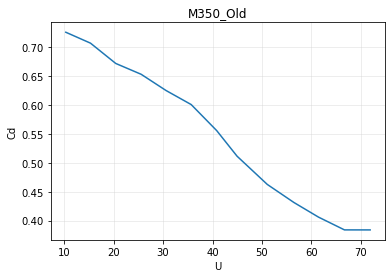

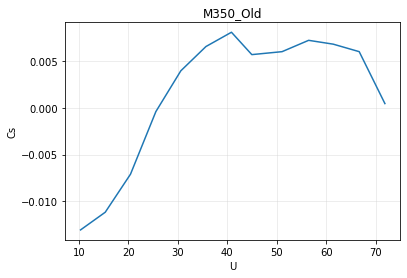

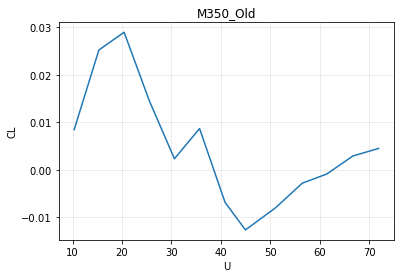

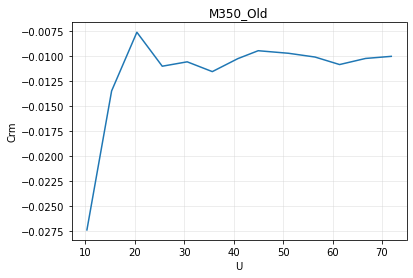

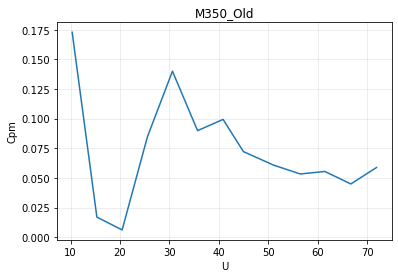

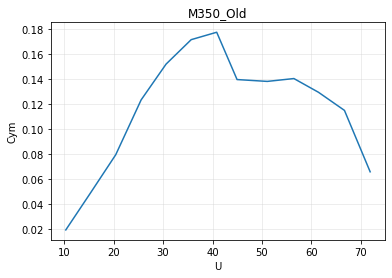

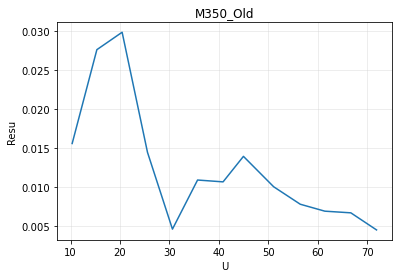

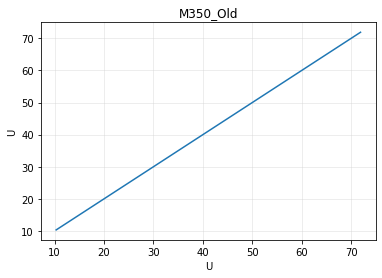

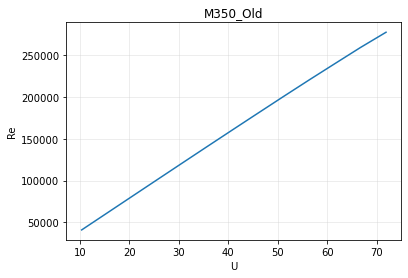

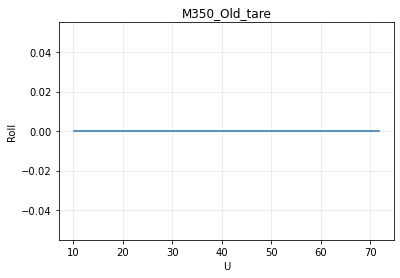

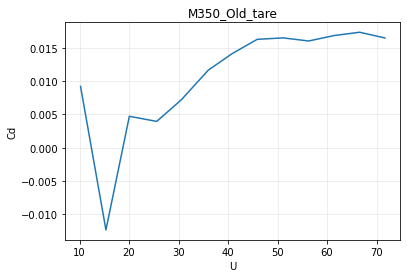

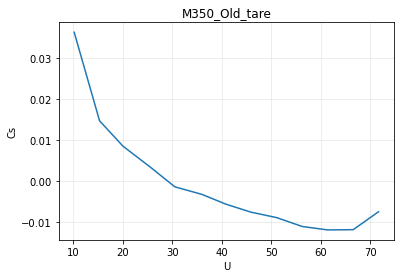

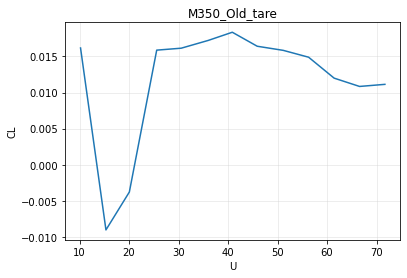

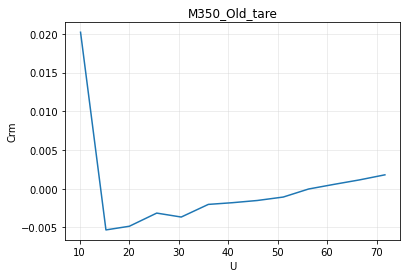

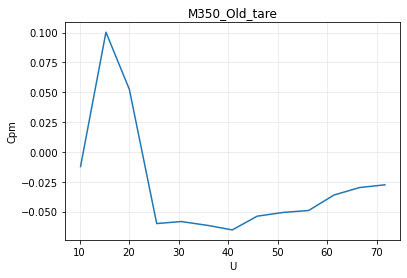

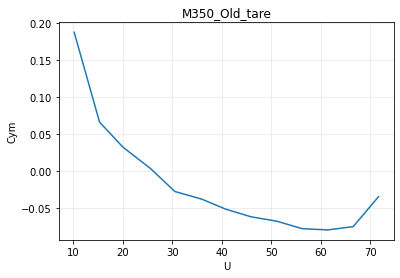

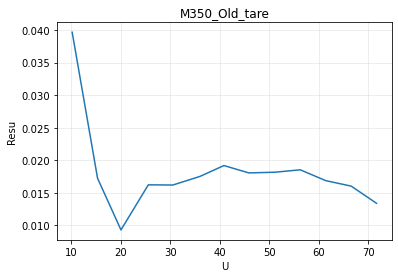

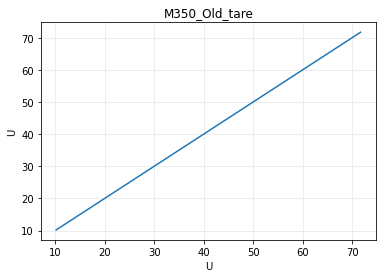

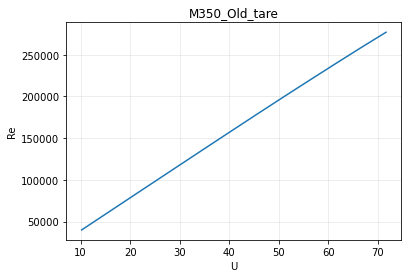

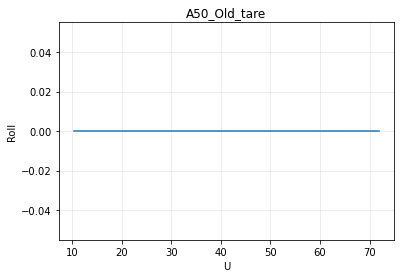

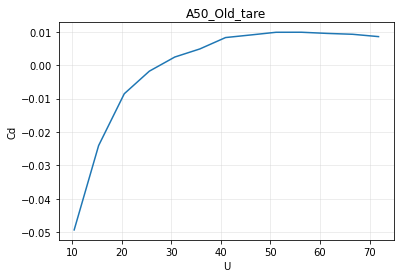

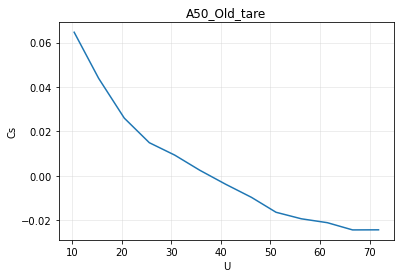

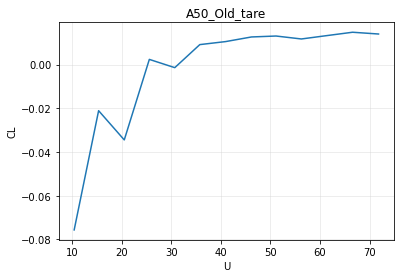

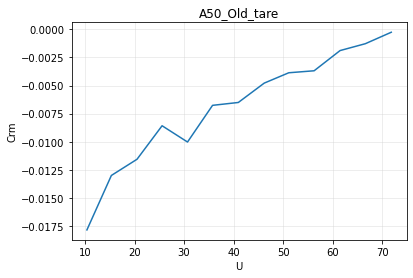

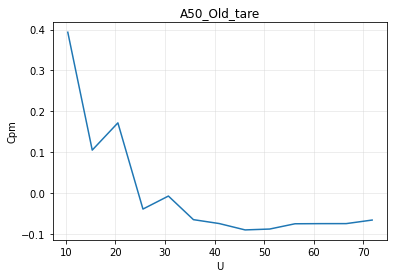

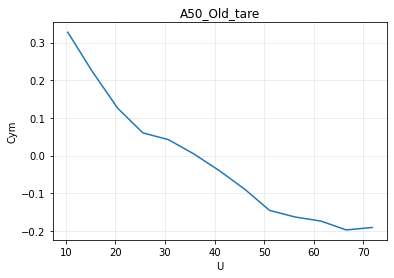

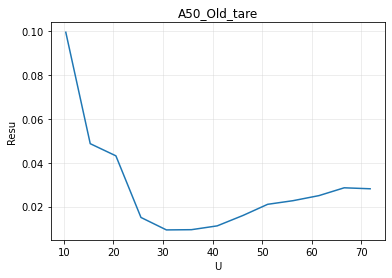

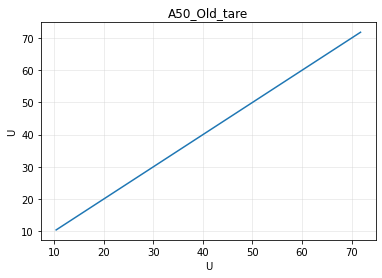

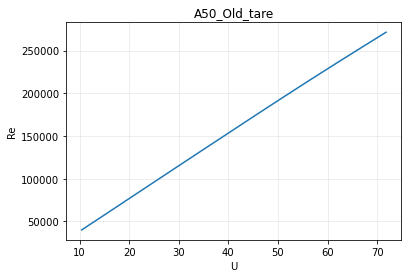

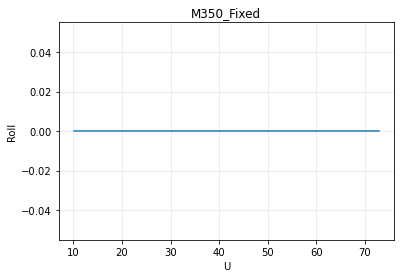

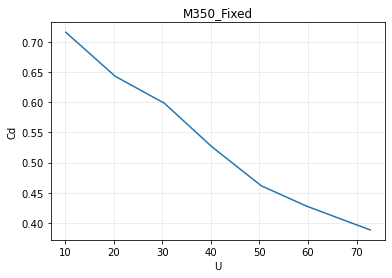

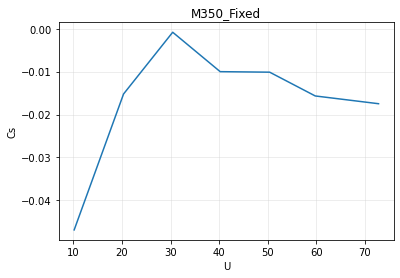

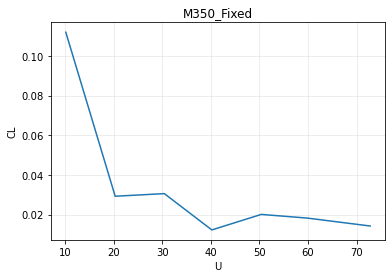

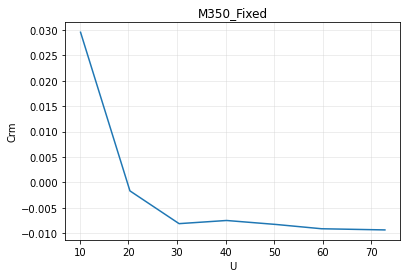

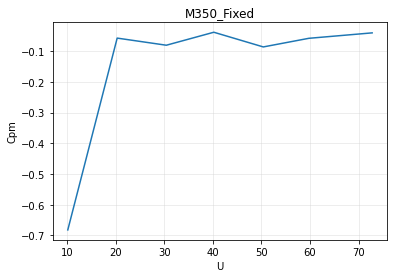

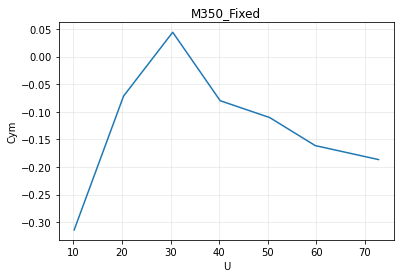

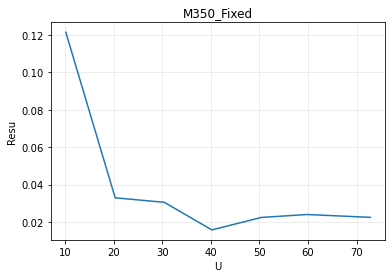

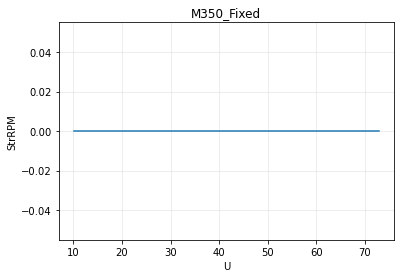

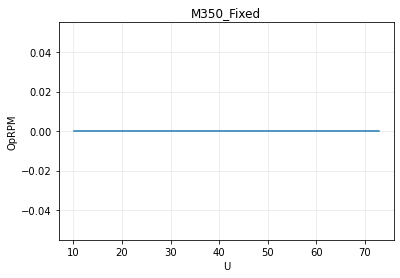

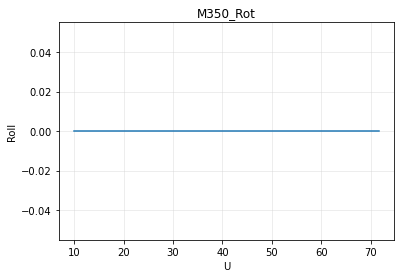

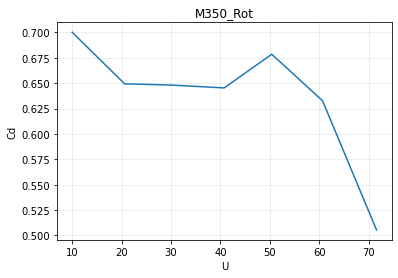

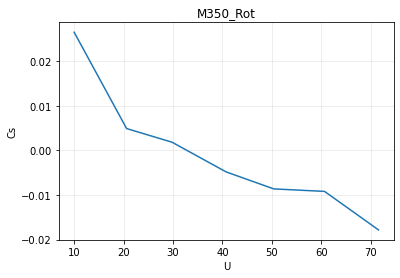

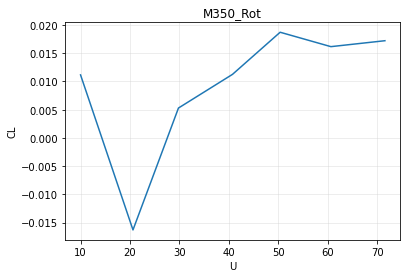

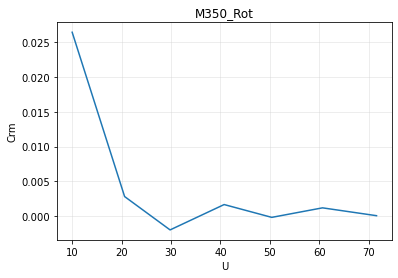

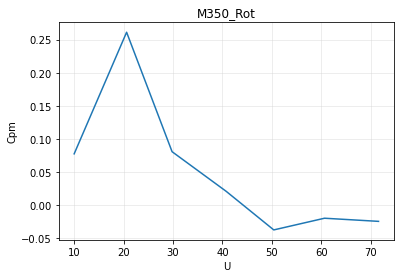

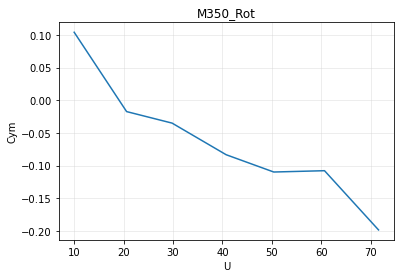

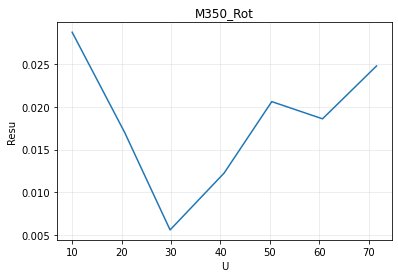

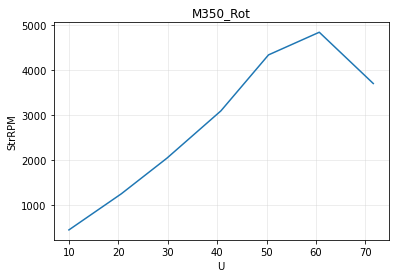

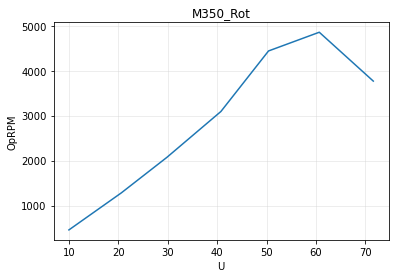

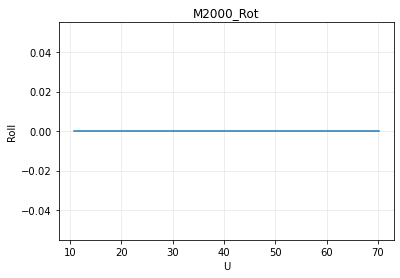

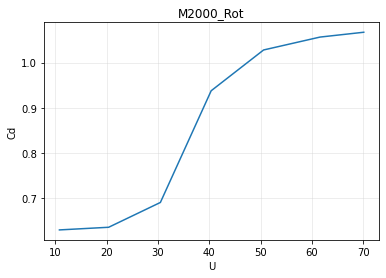

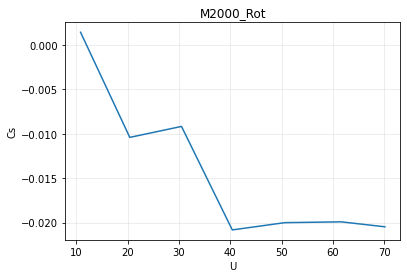

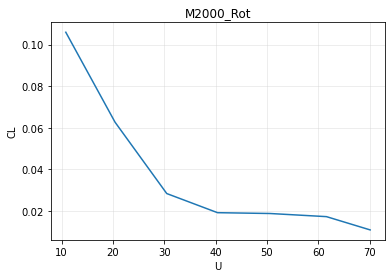

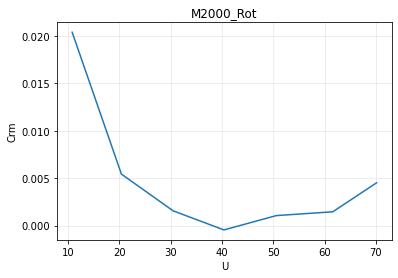

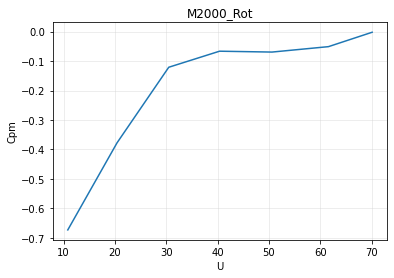

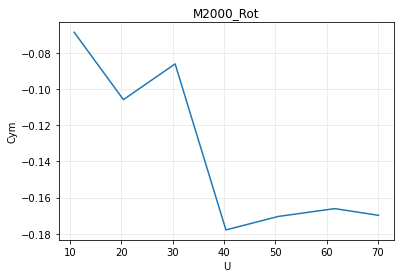

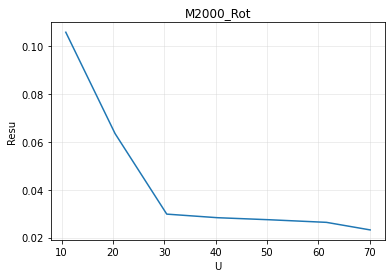

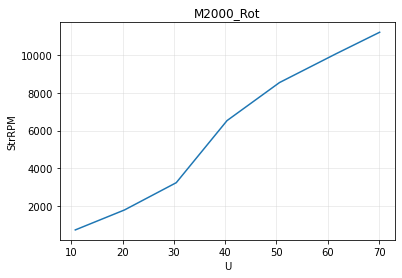

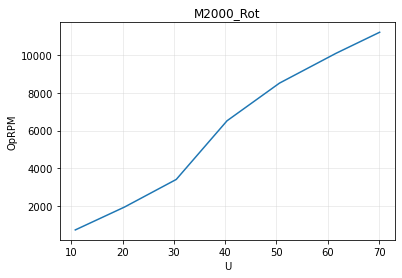

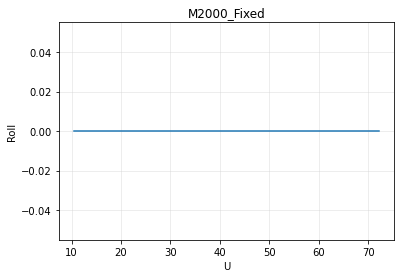

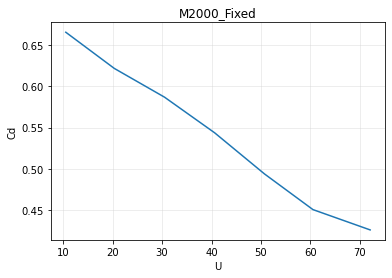

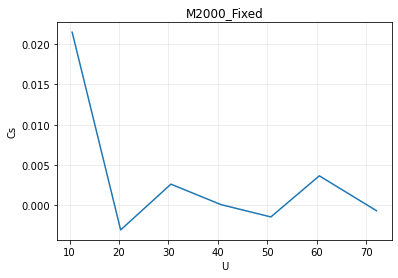

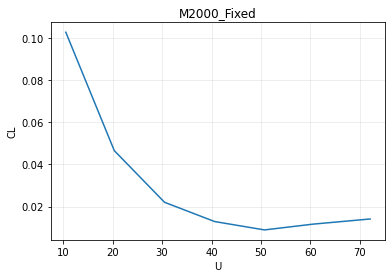

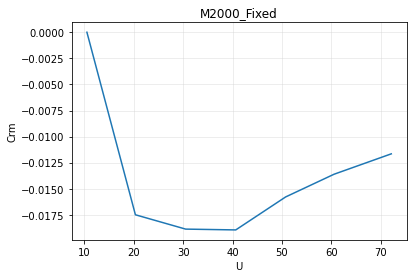

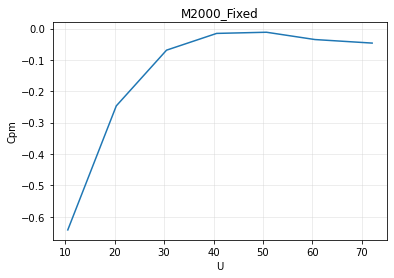

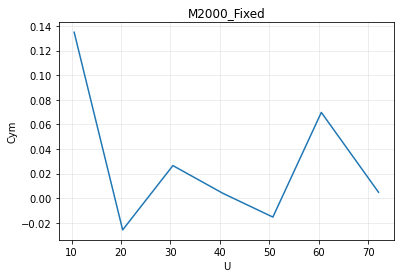

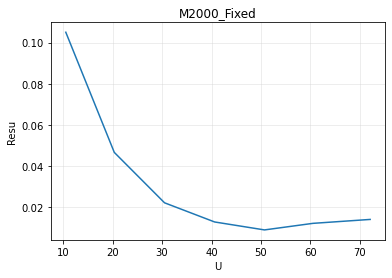

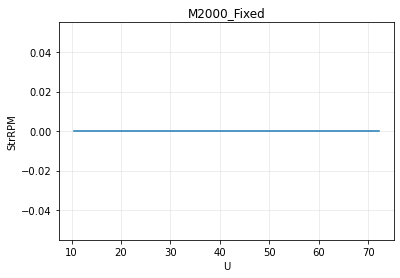

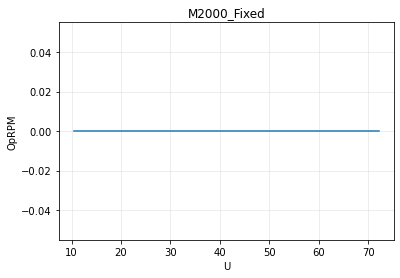

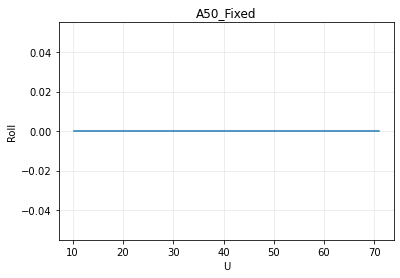

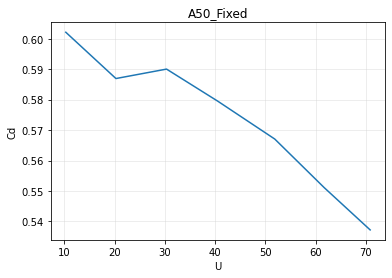

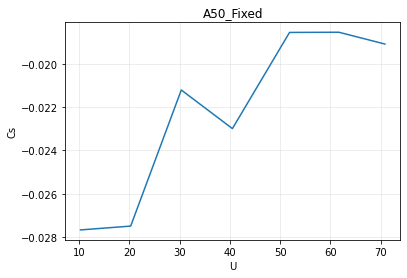

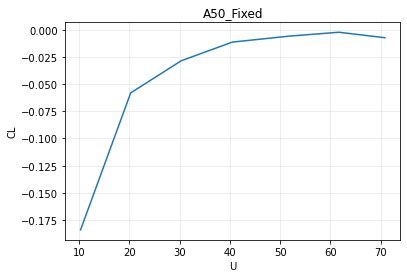

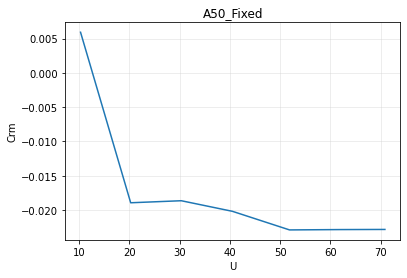

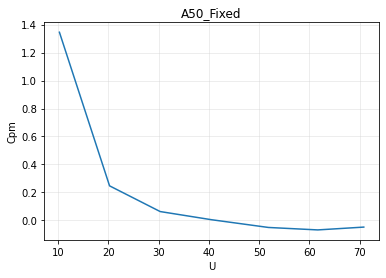

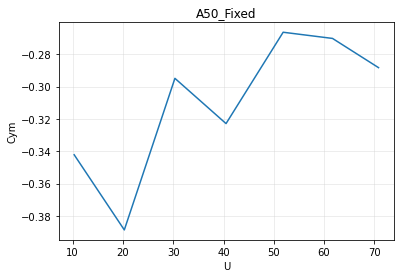

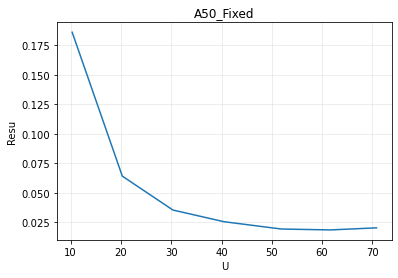

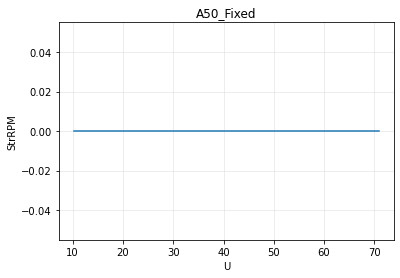

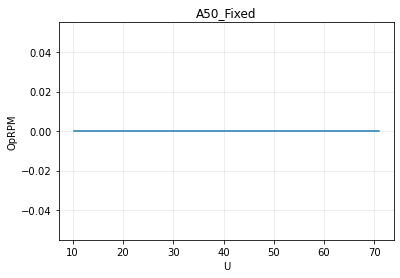

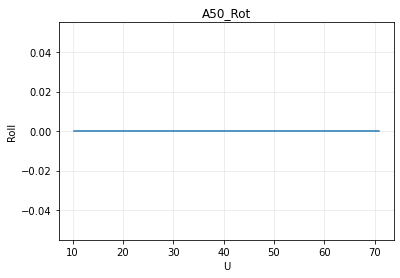

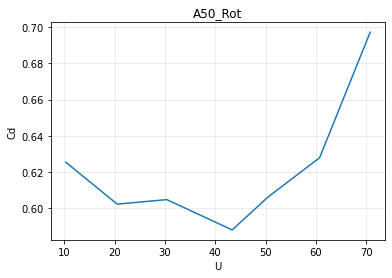

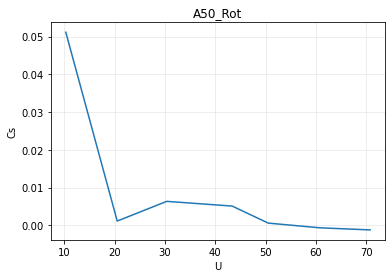

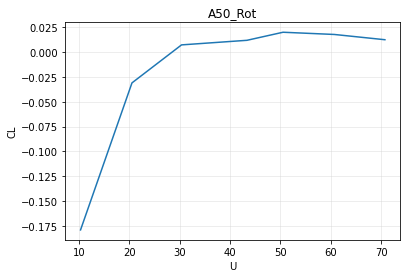

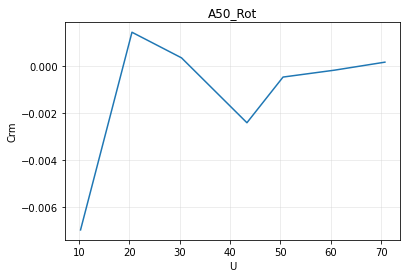

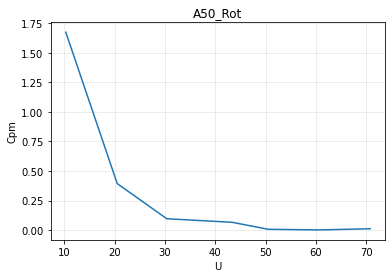

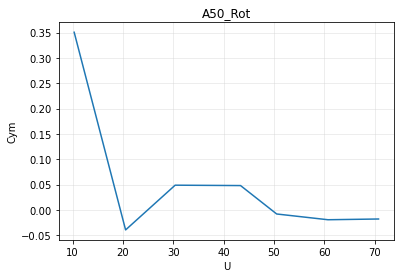

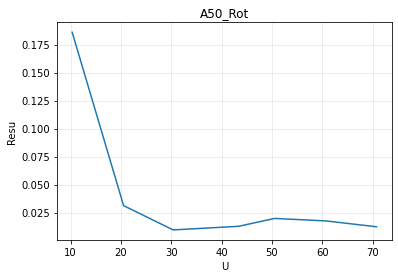

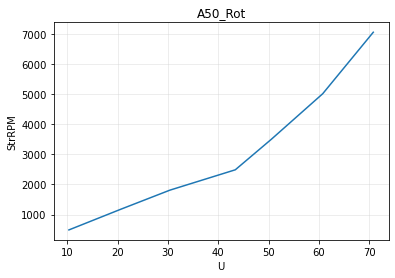

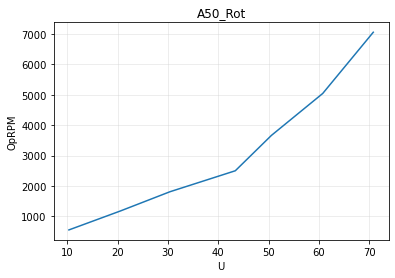

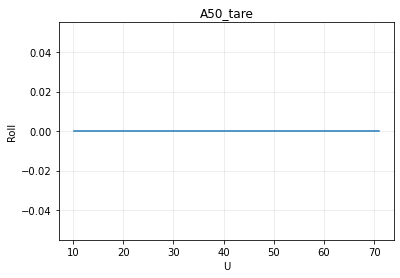

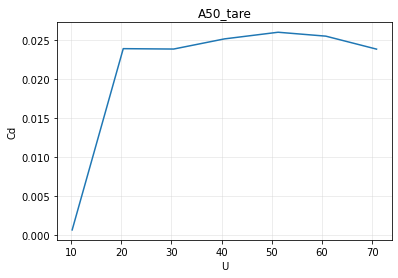

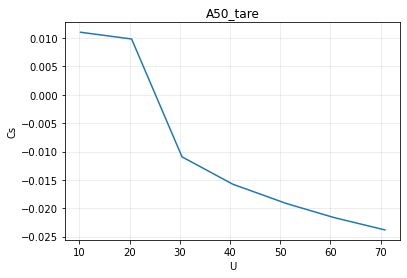

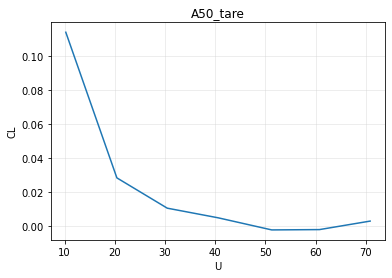

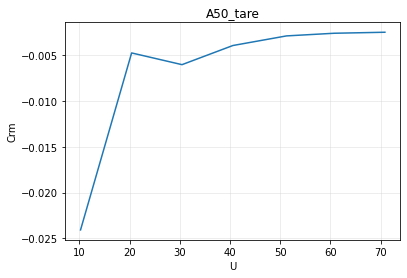

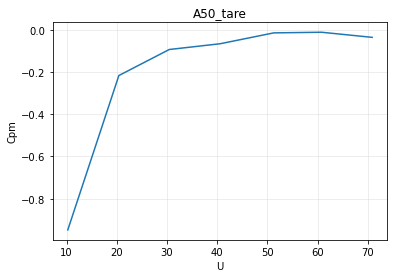

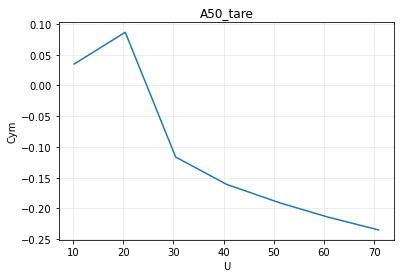

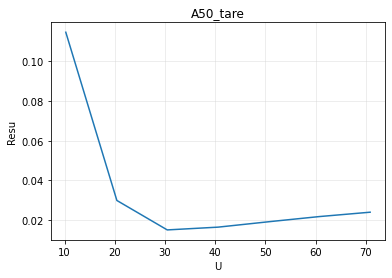

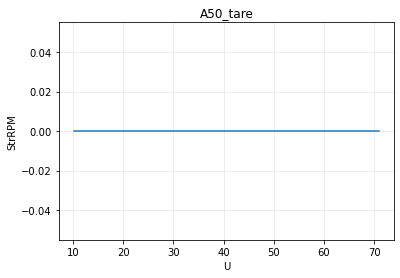

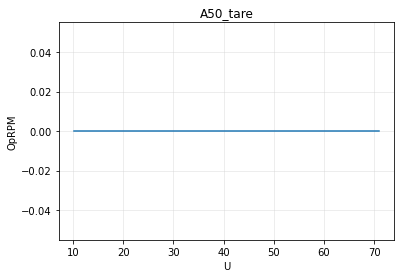

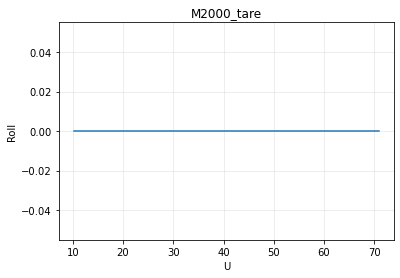

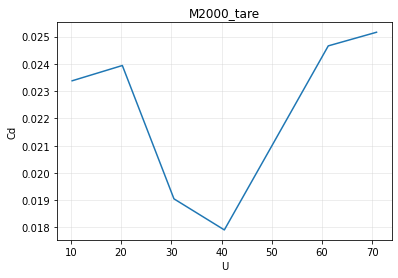

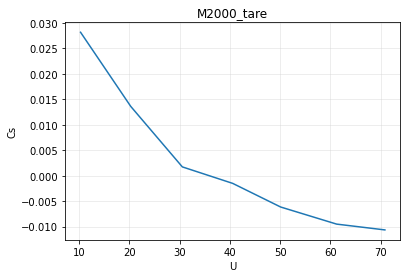

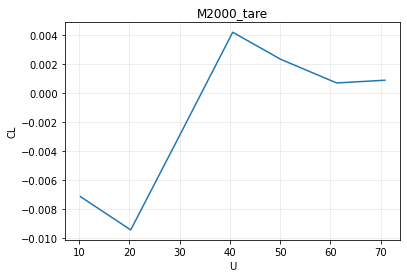

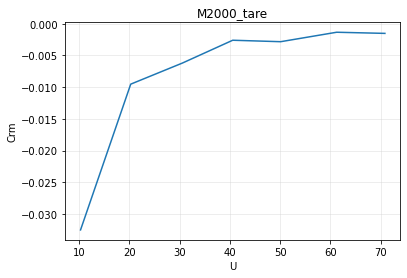

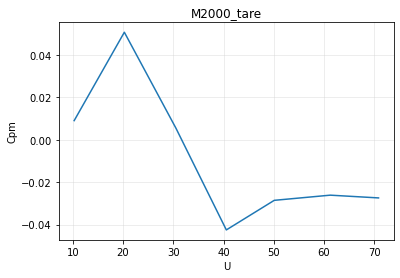

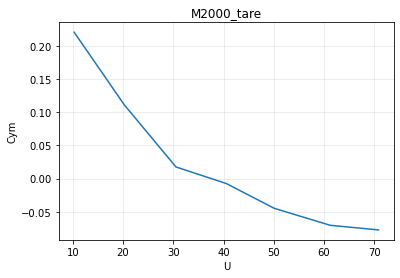

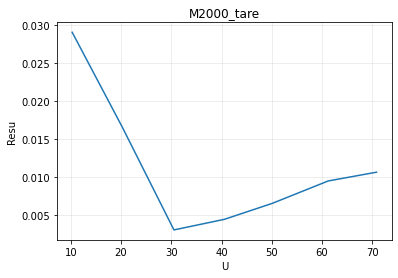

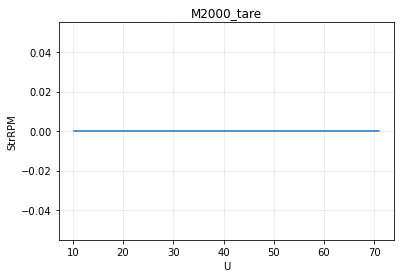

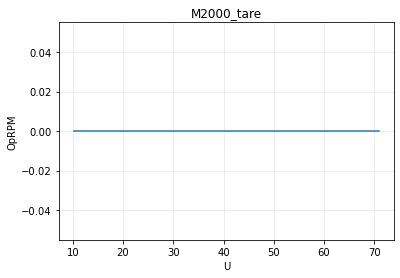

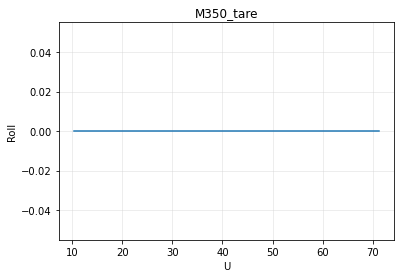

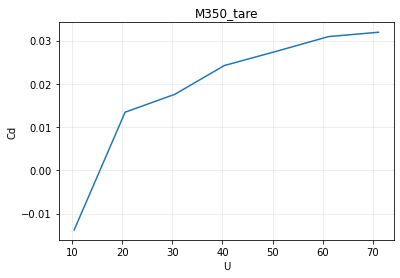

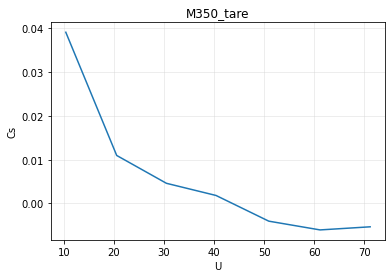

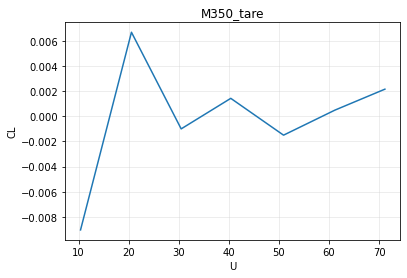

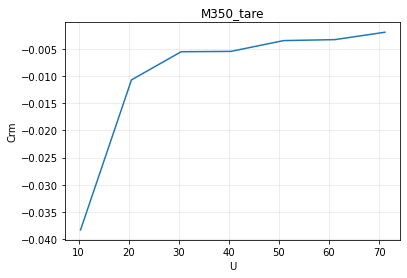

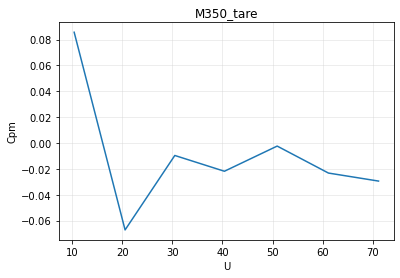

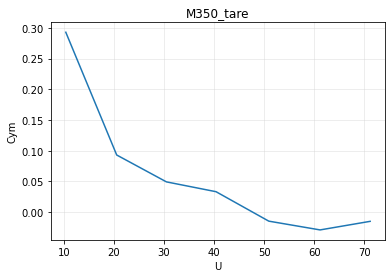

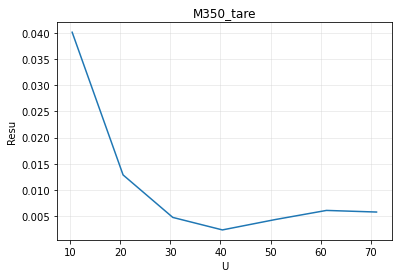

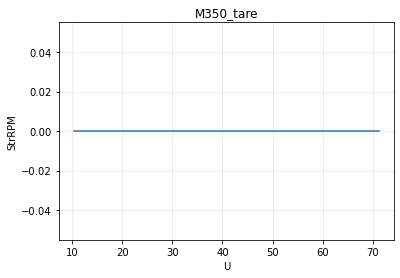

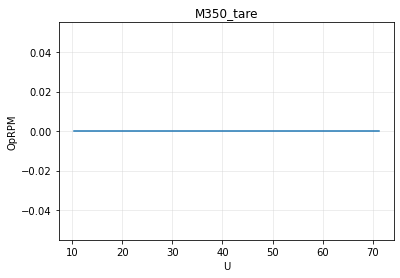

In [135]:
#plotting

count = 0
for i in range(len(df)):
    for j in df[i].columns[4:14]:
        plt.figure(count)
        count = count +1
        plt.plot(df[i]["U"],df[i][j])
        plt.title(col[i])
        plt.grid(color='lightgray', alpha=0.5, zorder=1)
        plt.ylabel(j)
        plt.xlabel('U')

In [136]:
col

['A50_Old',
 'M350_Old',
 'M350_Old_tare',
 'A50_Old_tare',
 'M350_Fixed',
 'M350_Rot',
 'M2000_Rot',
 'M2000_Fixed',
 'A50_Fixed',
 'A50_Rot',
 'A50_tare',
 'M2000_tare',
 'M350_tare']

In [137]:
#export to csv file
for i in range(len(df)-3):
    
    df[i].to_csv(col[i] + '.csv', index = False)

(20.0, 40.0)

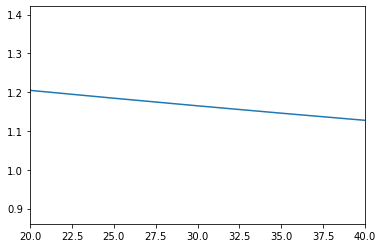

In [138]:
plt.plot(rovsT["Temperature (T) ◦c"],rovsT["Density (ρ) kg/m3"])
plt.xlim([20,40])

In [139]:
df[7]

,Qinf,Temp,Pitch,Yaw,Roll,Cd,Cs,CL,Crm,Cpm,Cym,Resu,StrRPM,OpRPM,U,Re,J
0,64.31649,30.0,0.0,0.0,0.0,0.665326,0.021482,0.102799,0.000014,-0.642014,0.134931,0.105019,0.0,0.0,10.508285,42594.071138,0.0
1,240.50137,30.0,0.0,0.0,0.0,0.621567,-0.003051,0.046578,-0.017505,-0.246601,-0.025849,0.046678,0.0,0.0,20.320269,82365.769769,0.0
2,541.51978,30.0,0.0,0.0,0.0,0.586747,0.002627,0.022039,-0.018881,-0.068894,0.026473,0.022195,0.0,0.0,30.491433,123593.362132,0.0
3,961.57462,30.0,0.0,0.0,0.0,0.543634,0.000089,0.012886,-0.018958,-0.015477,0.003864,0.012886,0.0,0.0,40.631436,164694.645684,0.0
4,1498.43322,30.0,0.0,0.0,0.0,0.493855,-0.001441,0.008912,-0.015794,-0.011767,-0.015404,0.009028,0.0,0.0,50.721183,205592.222135,0.0
5,2133.64669,30.0,0.0,0.0,0.0,0.450695,0.003663,0.011654,-0.013614,-0.035052,0.069731,0.012216,0.0,0.0,60.524600,245329.197058,0.0
6,3028.20212,30.0,0.0,0.0,0.0,0.426105,-0.000672,0.014105,-0.011657,-0.046351,0.004785,0.014121,0.0,0.0,72.104622,292267.425388,0.0


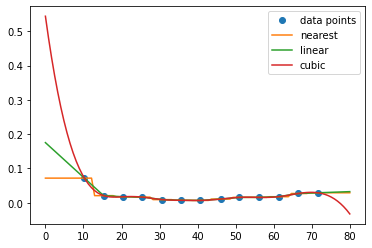

In [140]:
f_nearest = interpolate.interp1d(df[0]["U"], df[0]["Cs"], kind='nearest',fill_value='extrapolate')
f_linear  = interpolate.interp1d(df[0]["U"], df[0]["Cs"],fill_value='extrapolate')
f_cubic   = interpolate.interp1d(df[0]["U"], df[0]["Cs"], kind='cubic',fill_value='extrapolate')

x2 = np.linspace(0, 80, 100)
plt.plot(df[0]["U"], df[0]["Cs"], 'o', label='data points')
#pylab.plot(x2, f(x2, A, nu, k), label='exact')
plt.plot(x2, f_nearest(x2), label='nearest')
plt.plot(x2, f_linear(x2), label='linear')
plt.plot(x2, f_cubic(x2), label='cubic')
plt.legend()
plt.show()